In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeans:
    def __init__(self, clusters = 3, iterations = 1000,tol = 1e-4 ):
        self.clusters = clusters
        self.max_iter = iterations
        self.centroids = None
        self.tol = tol
    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for i in range(self.max_iter):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.all(np.linalg.norm(self.centroids-new_centroids, axis=1)< self.tol):
                break
            self.centroids = new_centroids
        self.labels_ = labels
    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis]-self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    def _initialize_centroids(self, X):
        n_samples = X.shape[0]
        random_idxs = np.random.choice(n_samples, self.clusters, replace=True)
        return X[random_idxs]
    def _assign_clusters(self,X):
        distances = np.linalg.norm(X[:, np.newaxis]-self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    def _update_centroids(self, X, labels):
        centroids = np.zeros((self.clusters, X.shape[1]))
        for k in range(self.clusters):
            cluster_points = X[labels==k]
            if len(cluster_points)>0:
                centroids[k] = cluster_points.mean(axis=0)
        return centroids

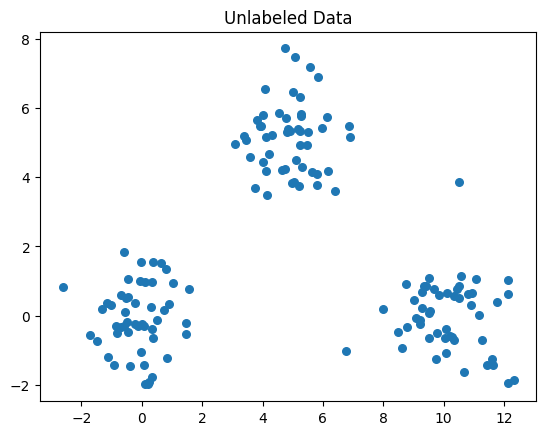

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Create 3 cluster centers with Gaussian noise
cluster_1 = np.random.randn(50, 2) + np.array([0, 0])
cluster_2 = np.random.randn(50, 2) + np.array([5, 5])
cluster_3 = np.random.randn(50, 2) + np.array([10, 0])

# Combine into one dataset
X = np.vstack((cluster_1, cluster_2, cluster_3))

# Optional: Visualize raw data
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Unlabeled Data")
plt.show()

In [8]:
kmeans = KMeans(clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

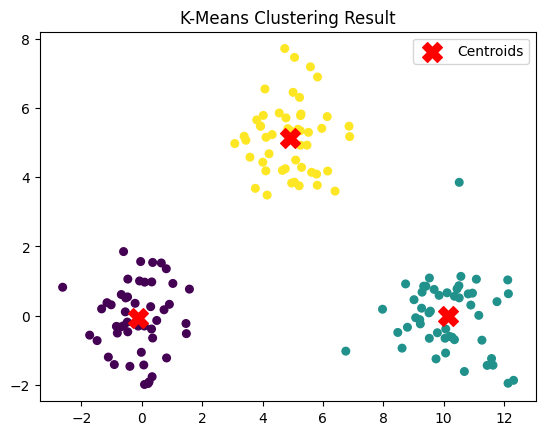

In [9]:
# Plot clustered data with color per cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)

# Plot centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering Result")
plt.legend()
plt.show()